In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import gc

GOAL : 
====
predict
* The task is to forecast the total amount of products sold in every shop for the test set.
* The test set. You need to forecast the sales for these shops and products for November 2015.

**Note** 
*  the list of shops and products slightly changes every month

submission :
=====
ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5

In [2]:
DATA_FOLDER = '../data/'

In [3]:
transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [4]:
tests = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

In [5]:
# sample_sub = pd.read_csv(os.path.join(DATA_FOLDER,'sample_submission.csv'))

In [6]:
tests.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Data overview

In [7]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
tests.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# EDA

In [12]:
trans_date = pd.to_datetime(transactions.date,format='%d.%m.%Y')

In [13]:
# transactions['date'] = transactions.date.map(lambda x:pd.to_datetime(x,format='%d.%m.%Y'))
transactions['date'] = trans_date
transactions.set_index('date',inplace=True)

In [14]:
transactions['amount_price'] = transactions.item_price * transactions.item_cnt_day
revenue_monthly_by_shop = pd.groupby(transactions, by=[transactions.index.year, 
                                                       transactions.index.month, 
                                                       transactions.shop_id])[['amount_price']].sum()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods


In [15]:
revenue_monthly_by_shop.index.rename(['year','month','shop_id'],inplace=True)
revenue_monthly_by_shop.head()

amount_price
year month shop_id              
2013 1     0          2966412.00
           1          1527320.00
           2          1085064.80
           3           560585.01
           4          1433666.00

In [16]:
idx = pd.IndexSlice
monthly_revenue_shop234 = revenue_monthly_by_shop.loc[idx[:,:,range(10,20)],:]
monthly_revenue_shop234.head(10)

amount_price
year month shop_id              
2013 1     10          577494.00
           12          996495.75
           13          225435.00
           14         1264646.00
           15         2024127.00
           16         1999620.50
           18         2742707.00
           19         2118666.55
     2     10          636783.00
           12         1370670.70

In [17]:
monthly_revenue_shop234.reset_index(inplace=True)
monthly_revenue_shop234['date'] = pd.to_datetime(monthly_revenue_shop234.year*10000 + monthly_revenue_shop234.month*100 + 1, format='%Y%m%d')
monthly_revenue_shop234.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,year,month,shop_id,amount_price,date
0,2013,1,10,577494.00,2013-01-01
1,2013,1,12,996495.75,2013-01-01
2,2013,1,13,225435.00,2013-01-01
3,2013,1,14,1264646.00,2013-01-01
4,2013,1,15,2024127.00,2013-01-01


In [18]:
monthly_revenue_shop234 = monthly_revenue_shop234[['shop_id','amount_price','date']].set_index('date')
monthly_revenue_shop234.head(10)

,shop_id,amount_price
date,,
2013-01-01,10,577494.00
2013-01-01,12,996495.75
2013-01-01,13,225435.00
2013-01-01,14,1264646.00
2013-01-01,15,2024127.00
2013-01-01,16,1999620.50
2013-01-01,18,2742707.00
2013-01-01,19,2118666.55
2013-02-01,10,636783.00


In [19]:
monthly_revenue_shop234.pivot(columns='shop_id',values='amount_price').head()

shop_id,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,
2013-01-01,577494.0,NaN,996495.75,225435.0,1264646.0,2024127.0,1999620.5,NaN,2742707.0,2118666.55
2013-02-01,636783.0,NaN,1370670.70,226880.0,1270446.5,2011249.0,1737058.0,NaN,3066448.0,1859942.00
2013-03-01,596111.0,NaN,1893864.10,311521.0,1358005.0,1998164.6,1996357.0,NaN,3304036.7,1937416.00
2013-04-01,368563.0,NaN,1360277.45,240835.0,858036.0,1381703.0,1262198.0,NaN,2247598.0,1430535.00
2013-05-01,353021.0,NaN,1115095.60,225950.0,881561.0,1255709.0,1230459.0,NaN,2443014.0,1206345.00


In [20]:
transactions.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'amount_price'],
      dtype='object')

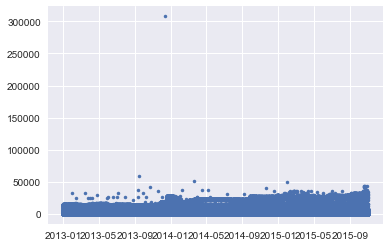

In [21]:
plt.plot(transactions.loc[:,'item_price'],'.')

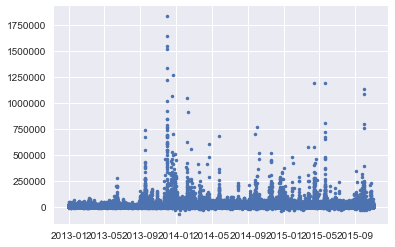

In [22]:
plt.plot(transactions.loc[:,'amount_price'],'.')

finding : 
- need to trim data 

In [23]:
transactions.item_cnt_day.value_counts().sort_index()

-22.0            1
-16.0            1
-9.0             1
-6.0             2
-5.0             4
-4.0             3
-3.0            14
-2.0            78
-1.0          7252
 1.0       2629372
 2.0        194201
 3.0         47350
 4.0         19685
 5.0         10474
 6.0          6338
 7.0          4057
 8.0          2903
 9.0          2177
 10.0         1820
 11.0         1263
 12.0         1083
 13.0          918
 14.0          716
 15.0          638
 16.0          544
 17.0          438
 18.0          391
 19.0          347
 20.0          364
 21.0          290
            ...   
 230.0           1
 231.0           1
 240.0           1
 242.0           1
 251.0           1
 255.0           1
 264.0           1
 288.0           1
 299.0           1
 300.0           1
 313.0           2
 325.0           1
 343.0           1
 401.0           2
 405.0           1
 412.0           1
 480.0           1
 500.0           2
 501.0           1
 502.0           1
 504.0           1
 508.0      

In [24]:
cond = (transactions.item_price<100000) & (transactions.item_cnt_day <= 1000)
trans_wo_outlier = transactions[cond]


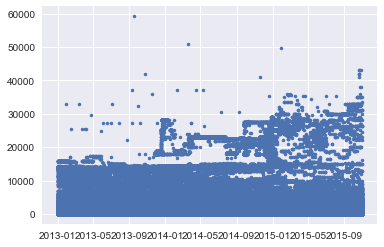

In [25]:
plt.plot(trans_wo_outlier.loc[:,'item_price'],'.')

finding:

- higher `item_price` numbers increase w.r.t date

In [26]:
import matplotlib.dates as mdates


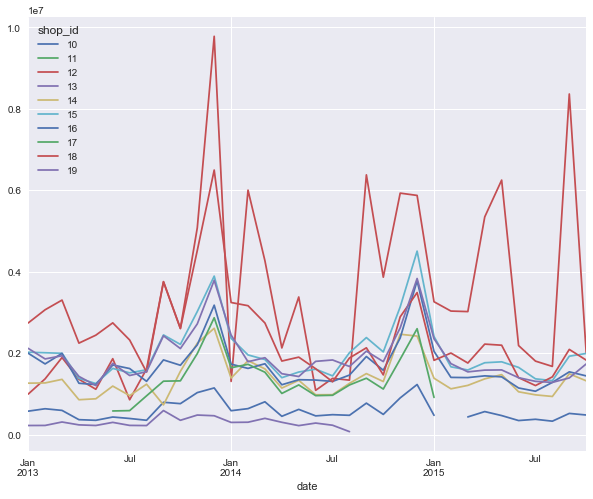

In [27]:
fig,ax = plt.subplots(figsize= (10,8))
## plot each shop monthly reveune
monthly_revenue_plot = monthly_revenue_shop234.pivot(columns='shop_id',values='amount_price')
monthly_revenue_plot.plot(ax=ax,grid=1)

# ax.plot_date(monthly_revenue_plot.axes[0].to_pydatetime(), monthly_revenue_plot, '-')
# ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth=1))
#set ticks every month
#set major ticks format


**FINDING:** 
1. seems there exist peaks periodically at **DEC** and **SEP** , **March**(slightly)
2. some of store would shut down ? (`shop_id=0,1,8`)

___


Q: Hottest items in each shop

In [28]:
## total items
len(items.item_id.unique())

22170

In [29]:
transactions.date_block_num.unique() ## monthly 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], dtype=int64)

In [30]:
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price
date,,,,,,
2013-01-02,0,59,22154,999.00,1.0,999.00
2013-01-03,0,25,2552,899.00,1.0,899.00
2013-01-05,0,25,2552,899.00,-1.0,-899.00
2013-01-06,0,25,2554,1709.05,1.0,1709.05
2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [31]:
item_cnt_monthly_shop = transactions.groupby(['shop_id','date_block_num','item_id',])['item_cnt_day'].sum()

In [32]:
item_cnt_monthly_shop.rename('sold_cnt',inplace=True)
# item_cnt_monthly_shop.reset_index(inplace=True)

shop_id  date_block_num  item_id
0        0               32          6.0
                         33          3.0
                         35          1.0
                         43          1.0
                         51          2.0
                         61          1.0
                         75          1.0
                         88          1.0
                         95          1.0
                         96          1.0
                         98         25.0
                         111         1.0
                         149         3.0
                         151         1.0
                         153         1.0
                         198         1.0
                         210         2.0
                         282         1.0
                         306         1.0
                         351         1.0
                         421         1.0
                         438         1.0
                         482         2.0
                        

In [33]:
# item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num'])['item_id','sold_cnt'].agg({'sold_cnt':min}).reset_index()

In [34]:
item_cnt_monthly_shop_df = item_cnt_monthly_shop.reset_index()
top_sells_monthly_shop_df = item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num']).max().reset_index()
# top_sells_monthly_shop_df.head()

In [35]:
item_cnt_monthly_shop_df.head()

,shop_id,date_block_num,item_id,sold_cnt
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [36]:
top_sells_monthly_shop_df = top_sells_monthly_shop_df.merge(items,on='item_id')
top_sells_monthly_shop_df = top_sells_monthly_shop_df.merge(item_categories, on ='item_category_id')

In [37]:
top_sells_monthly_shop_df.head()

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
0,0,0,22160,39.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
1,0,1,22160,67.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
2,6,0,22160,45.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
3,6,8,22160,269.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
4,7,0,22160,31.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD


In [38]:
top_sells_monthly_shop_df[top_sells_monthly_shop_df.shop_id == 7].sort_values('date_block_num').head()

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
4,7,0,22160,31.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
49,7,1,22151,31.0,ЯВЛЕНИЕ (2012),40,Кино - DVD
290,7,2,22147,75.0,Я-ЛЕГЕНДА WB (регион),40,Кино - DVD
333,7,3,22136,15.0,"Я, АЛЕКС КРОСС (регион)",40,Кино - DVD
249,7,4,22152,50.0,ЯВЛЕНИЕ (2012) (регион),40,Кино - DVD


hottest item_category?

In [39]:
item_cnt_monthly_shop_df = item_cnt_monthly_shop_df.merge(items,on='item_id')
item_cnt_monthly_shop_df = item_cnt_monthly_shop_df.merge(item_categories,on='item_category_id')


In [40]:
item_cnt_monthly_shop_df.head(3)

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
0,0,0,32,6.0,1+1,40,Кино - DVD
1,0,1,32,10.0,1+1,40,Кино - DVD
2,1,0,32,7.0,1+1,40,Кино - DVD


In [41]:
cat_monthly_shop_df = item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num','item_category_name']).agg({'sold_cnt':sum})
cat_monthly_shop_df.head()

sold_cnt
shop_id date_block_num item_category_name             
0       0              Аксессуары - PS3           53.0
                       Аксессуары - PS4           28.0
                       Аксессуары - PSP           16.0
                       Аксессуары - PSVita        28.0
                       Аксессуары - XBOX 360      65.0

In [42]:
g = cat_monthly_shop_df.groupby(level=[0,1],group_keys=None)
# g.apply(lambda x:x.order(ascending=False).head(3))

In [43]:
top_sells_category_monthly_shop = g.apply(lambda x:x.sold_cnt.sort_values(ascending=False).head(5)).reset_index()
top_sells_category_monthly_shop.head(5)

,shop_id,date_block_num,item_category_name,sold_cnt
0,0,0,Кино - DVD,1838.0
1,0,0,Игры PC - Стандартные издания,761.0
2,0,0,Музыка - CD локального производства,426.0
3,0,0,Игры - PS3,345.0
4,0,0,Кино - Blu-Ray,302.0


In [44]:
cond = top_sells_category_monthly_shop.date_block_num== 23
top_sells_category_monthly_shop[(top_sells_category_monthly_shop['shop_id']==6) & cond] 

,shop_id,date_block_num,item_category_name,sold_cnt
810,6,23,Музыка - CD локального производства,508.0
811,6,23,Кино - DVD,383.0
812,6,23,Игры PC - Стандартные издания,291.0
813,6,23,Игры - PS4,255.0
814,6,23,Кино - Blu-Ray,237.0


In [45]:
shopid = 19
mask = (top_sells_category_monthly_shop['shop_id']== shopid)
top3_cat_shop = top_sells_category_monthly_shop[['date_block_num','item_category_name','sold_cnt']][mask]

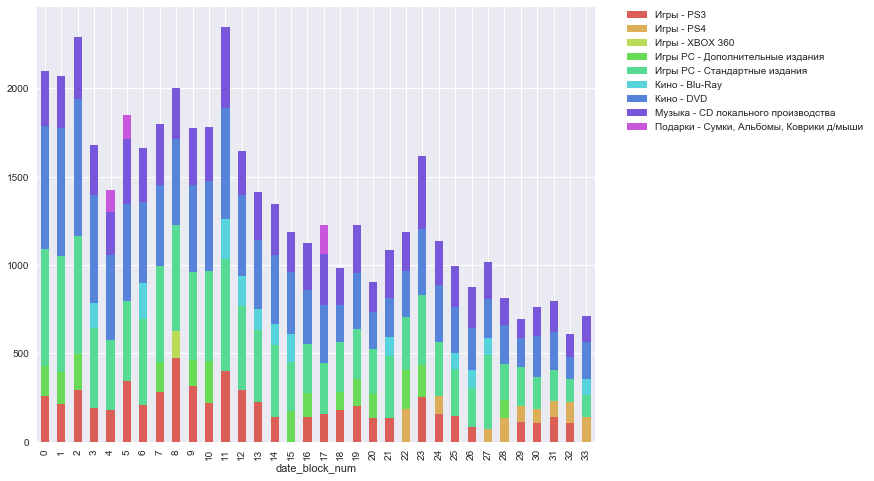

In [46]:
seq_col_brew = sns.color_palette("hls", n_colors=10)

sns.set_palette(seq_col_brew)
top3_cat_shop.pivot(index='date_block_num',columns='item_category_name',values='sold_cnt').plot(figsize= (10,8),kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #outside plot

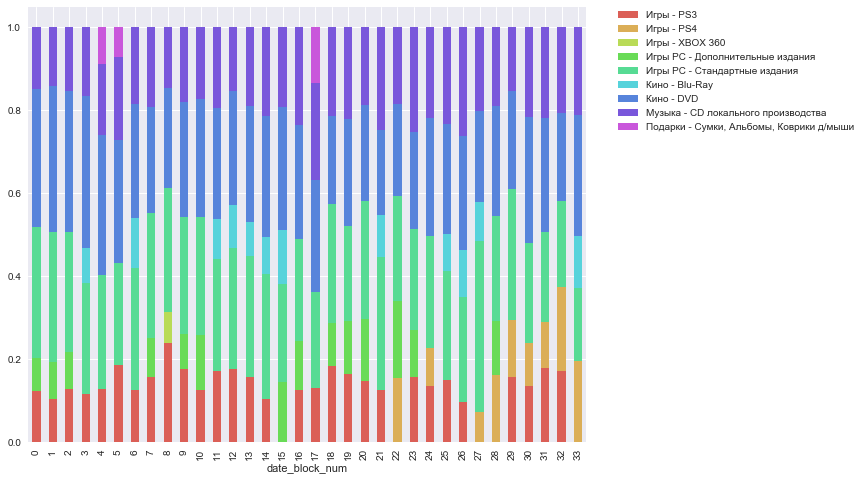

In [47]:
top3_shop_perct = top3_cat_shop.pivot(index='date_block_num',columns='item_category_name',values='sold_cnt')
top3_shop_perct.div(top3_shop_perct.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #outside plot

**finding**
1. top sell category: 
    - pcgame
    - dvd movie 
    - music
2. DVD (and total) sells amount drop but revenue didn't drop a lot **WHY**
    - guess : some higher price item cover that revenue drop ?? WHAT IS IT??

Q: WHAT **item_category keep growing** to cover the sell amount drop of pcgame, dvd movie...

In [48]:
trans_with_cat = transactions.merge(items,on='item_id')
trans_with_cat = trans_with_cat.merge(item_categories,on='item_category_id')
trans_with_cat.head()
# .groupby(['date_block_num','shop_id',])

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price,item_name,item_category_id,item_category_name
0,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [49]:
monthly_revenue_by_shop_cat = trans_with_cat.groupby(['shop_id','date_block_num','item_category_id','item_category_name'])['amount_price'].sum()

In [50]:
g = monthly_revenue_by_shop_cat.groupby(level=[0,1],group_keys=None)
top3cat_monthly_revenue = g.apply(lambda x:x.sort_values(ascending=False).head(3))


In [51]:
top3cat_monthly_revenue_df = pd.DataFrame(top3cat_monthly_revenue)
shopid = 19
idx = pd.IndexSlice
top3cat_revenue = top3cat_monthly_revenue_df.loc[idx[shopid,:],:]

# [idx[:,:,range(10,20)],:]

In [52]:
# top3cat_revenue.reset_index(inplace=True)

In [53]:
top3cat_revenue.head()

amount_price
shop_id date_block_num item_category_id item_category_name                         
19      0              19               Игры - PS3                        379291.00
                       30               Игры PC - Стандартные издания     320004.00
                       40               Кино - DVD                        193114.00
        1              30               Игры PC - Стандартные издания     350577.77
                       19               Игры - PS3                        314014.50

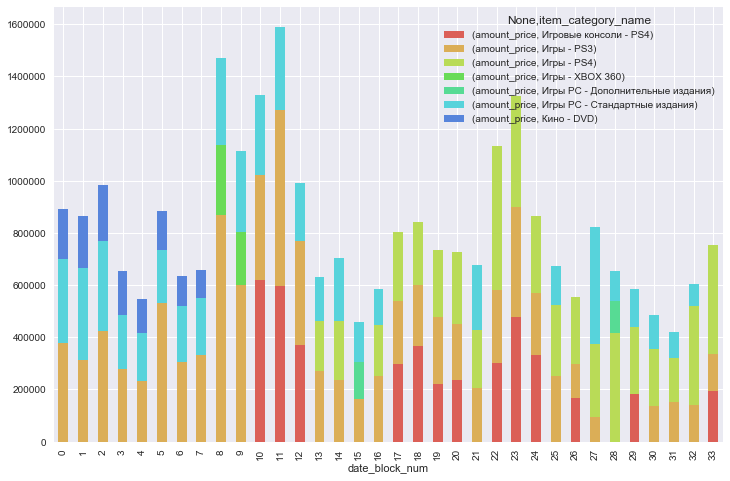

In [54]:
top3cat_revenue.reset_index(level=[0,-2],drop=True).reset_index(level=1).pivot(columns='item_category_name').plot(kind='bar',stacked=True,figsize=(12,8))

**finding:** 
1. seems  ps4,XBOX360 take place of pcgame, DVD revenue

Q: any outlier ?

In [55]:
counts_ = transactions.item_price.value_counts()
counts_.name = 'cnt'
counts_.index.name ='item_price'
item_price_cnt = counts_.reset_index()

In [56]:
item_price_cnt['zone']= pd.qcut(item_price_cnt.item_price,1000)
item_price_cnt.head(10)

,item_price,cnt,zone
0,299.0,291352,"(298.992, 299.372]"
1,399.0,242603,"(398.999, 399.449]"
2,149.0,218432,"(148.97, 149.474]"
3,199.0,184044,"(198.877, 199.321]"
4,349.0,101461,"(348.537, 349.096]"
5,599.0,95673,"(598.987, 599.399]"
6,999.0,82784,"(998.948, 999.208]"
7,799.0,77882,"(798.942, 799.286]"
8,249.0,77685,"(248.494, 249.008]"
9,699.0,76493,"(698.963, 699.291]"


In [57]:
item_price_cnt.groupby('zone')['cnt'].sum()

zone
(-1.001, 3.72]             5929
(3.72, 4.76]                166
(4.76, 4.923]               108
(4.923, 4.961]               66
(4.961, 4.997]               48
(4.997, 19.264]           31192
(19.264, 24.538]            422
(24.538, 26.084]           2101
(26.084, 27.898]            264
(27.898, 33.609]          10186
(33.609, 39.091]            433
(39.091, 44.982]            599
(44.982, 49.045]           4303
(49.045, 51.862]            964
(51.862, 54.906]            102
(54.906, 56.187]            260
(56.187, 57.897]            118
(57.897, 59.563]           8174
(59.563, 62.489]           1063
(62.489, 65.205]           1058
(65.205, 66.963]            214
(66.963, 68.482]            496
(68.482, 69.851]           5540
(69.851, 71.412]           2099
(71.412, 73.692]           1351
(73.692, 75.433]           2939
(75.433, 77.783]           4958
(77.783, 79.347]           5628
(79.347, 82.077]            763
(82.077, 83.544]             86
                          ...  
(15

In [58]:
item_price_cnt.cnt.sum()

2935849

In [59]:
cond = (item_price_cnt.item_price>10) & (item_price_cnt.item_price<100000)
item_price_frac = item_price_cnt[cond]
item_price_frac.cnt.sum()

2899765

In [60]:
print('data keep: {:.2f}%'.format(item_price_frac.cnt.sum()/item_price_cnt.cnt.sum() * 100))

data keep: 98.77%


**choose **

* item_price <= 10, >=100000 -- outlier
* keep 98.77% data

In [61]:
trans_with_cat.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price,item_name,item_category_id,item_category_name
0,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


_____

# BASELINE 
`previous_value_benchmark`

As the name suggest - in this benchmark for the each shop/item pair our predictions are just monthly sales from the previous month, i.e. October 2015.

In [63]:
tests.count()

ID         214200
shop_id    214200
item_id    214200
dtype: int64

In [ ]:
# trans_201510 = transactions.loc['20151001':'20151031']
# prev_value_201510 = trans_201510.groupby(['shop_id','item_id'])['item_cnt_day'].sum()
# prev_value_201510.name = 'item_cnt_month'
# prev_value_201510 = prev_value_201510.reset_index()
# prev_value_201510.head()

In [ ]:
# previous_value_benchmark = prev_value_201510.merge(tests,on=['shop_id','item_id'],how='right').fillna(0)
# previous_value_benchmark = previous_value_benchmark[['ID','shop_id','item_id','item_cnt_month']]
# previous_value_benchmark.head()

**DONT FORGET** CLIP TO `[0,20]`

In [ ]:
# previous_value_benchmark.item_cnt_month = previous_value_benchmark.item_cnt_month.clip(0,20) 

In [ ]:
# submission_baseline = previous_value_benchmark[['ID','item_cnt_month']]
# submission_baseline.to_csv('../data/output/submission_baseline.csv',index=False) 
## score: 8.53 --- no clip to [0,20] 
## score: 1.167  ---- clip to [0,20]

____

# FEATURES 

This part most of code stolen from [this blog](http://mlwhiz.com/blog/2017/12/26/How_to_win_a_data_science_competition/)

##  Cleaning and concat test data

In [64]:
cond = (transactions.item_price<100000) & (transactions.item_cnt_day <= 1000)
trans_wo_outlier = transactions[cond]


In [65]:
trans_wo_outlier.shape

(2935847, 6)

In [66]:
tests['date_block_num'] = 34
tests.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34


In [67]:
trans_wo_outlier = pd.concat([trans_wo_outlier,tests])

In [68]:
trans_wo_outlier = trans_wo_outlier.merge(items,on='item_id',how='left')
trans_wo_outlier.shape

(3150047, 9)

In [69]:
trans_wo_outlier[trans_wo_outlier.date_block_num==34].head()

,ID,amount_price,date_block_num,item_cnt_day,item_id,item_price,shop_id,item_name,item_category_id
2935847,0.0,NaN,34,NaN,5037,NaN,5,"NHL 15 [PS3, русские субтитры]",19
2935848,1.0,NaN,34,NaN,5320,NaN,5,ONE DIRECTION Made In The A.M.,55
2935849,2.0,NaN,34,NaN,5233,NaN,5,"Need for Speed Rivals (Essentials) [PS3, русск...",19
2935850,3.0,NaN,34,NaN,5232,NaN,5,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23
2935851,4.0,NaN,34,NaN,5268,NaN,5,"Need for Speed [PS4, русская версия]",20


## Grid
Created a dataframe of all Date_block_num, Store and Item combinations:

In [70]:
from itertools import product 
index_cols = ['shop_id','item_id','date_block_num']
grid = []
for block_num in trans_wo_outlier.date_block_num.unique():
    cur_shops = trans_wo_outlier.loc[trans_wo_outlier.date_block_num == block_num, 'shop_id'].unique()
    cur_items = trans_wo_outlier.loc[trans_wo_outlier.date_block_num == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]]))))


grid = pd.DataFrame(np.vstack(grid), columns = index_cols, dtype=np.int32)

In [71]:
grid.head()

,shop_id,item_id,date_block_num
0,59,22154,0
1,59,2552,0
2,59,2554,0
3,59,2555,0
4,59,2564,0


In [72]:
grid.shape

(11128004, 3)

## create mean encoding

In [73]:
trans_wo_outlier.head().T

,0,1,2,3,4
ID,NaN,NaN,NaN,NaN,NaN
amount_price,999,899,-899,1709.05,1099
date_block_num,0,0,0,0,0
item_cnt_day,1,1,-1,1,1
item_id,22154,2552,2552,2554,2555
item_price,999,899,899,1709.05,1099
shop_id,59,25,25,25,25
item_name,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE Who Do You Think We Are LP,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)
item_category_id,37,58,58,58,56


In [74]:
trans_m = trans_wo_outlier.groupby(['date_block_num','shop_id','item_id']).agg(
    {'item_cnt_day':sum, 'item_price':np.mean}
).reset_index()
trans_m.rename(columns={'item_cnt_day':'item_cnt_month'},inplace=True)

In [75]:
trans_m = pd.merge(grid,trans_m,on=['date_block_num','shop_id','item_id'],how='left').fillna(0) 

In [76]:
# adding category id 
trans_m = trans_m.merge(items,on='item_id',how='left')

In [77]:
trans_m[trans_m.date_block_num==34].head()

,shop_id,item_id,date_block_num,item_price,item_cnt_month,item_name,item_category_id
10913804,5,5037,34,0.0,0.0,"NHL 15 [PS3, русские субтитры]",19
10913805,5,5320,34,0.0,0.0,ONE DIRECTION Made In The A.M.,55
10913806,5,5233,34,0.0,0.0,"Need for Speed Rivals (Essentials) [PS3, русск...",19
10913807,5,5232,34,0.0,0.0,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23
10913808,5,5268,34,0.0,0.0,"Need for Speed [PS4, русская версия]",20


In [78]:
for type_id in ['item_id','shop_id','item_category_id']:
    for column_id,aggregator,aggtype in [('item_price',np.mean,'avg'),('item_cnt_day',np.sum,'sum'),('item_cnt_day',np.mean,'avg')]:

        mean_df = trans_wo_outlier.groupby([type_id,'date_block_num']).aggregate(aggregator).reset_index()[[column_id,type_id,'date_block_num']]
        mean_df.columns = [type_id+'_'+aggtype+'_'+column_id,type_id,'date_block_num']

        trans_m = pd.merge(trans_m,mean_df,on=['date_block_num',type_id],how='left')

In [79]:
gc.collect()

343

In [80]:
trans_m[trans_m.date_block_num==34].head()

,shop_id,item_id,date_block_num,item_price,item_cnt_month,item_name,item_category_id,item_id_avg_item_price,item_id_sum_item_cnt_day,item_id_avg_item_cnt_day,shop_id_avg_item_price,shop_id_sum_item_cnt_day,shop_id_avg_item_cnt_day,item_category_id_avg_item_price,item_category_id_sum_item_cnt_day,item_category_id_avg_item_cnt_day
10913804,5,5037,34,0.0,0.0,"NHL 15 [PS3, русские субтитры]",19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10913805,5,5320,34,0.0,0.0,ONE DIRECTION Made In The A.M.,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10913806,5,5233,34,0.0,0.0,"Need for Speed Rivals (Essentials) [PS3, русск...",19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10913807,5,5232,34,0.0,0.0,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10913808,5,5268,34,0.0,0.0,"Need for Speed [PS4, русская версия]",20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Lag variables

In [81]:
trans_m.columns[7:]

Index(['item_id_avg_item_price', 'item_id_sum_item_cnt_day',
       'item_id_avg_item_cnt_day', 'shop_id_avg_item_price',
       'shop_id_sum_item_cnt_day', 'shop_id_avg_item_cnt_day',
       'item_category_id_avg_item_price', 'item_category_id_sum_item_cnt_day',
       'item_category_id_avg_item_cnt_day'],
      dtype='object')

In [82]:
lag_variables  = list(trans_m.columns[7:])+['item_cnt_month']
lag_df = [trans_m] # 
lags = [1,2,3,5,12]
for lag in lags:
    print('lag:{} processing...'.format(lag))
    trans_new_df = trans_m.copy()
    trans_new_df.date_block_num += lag
    trans_new_df = trans_new_df[['date_block_num','shop_id','item_id']+lag_variables]
    trans_new_df.columns = ['date_block_num','shop_id','item_id']+ [lag_feat+'_lag_'+str(lag) for lag_feat in lag_variables]
    lag_df.append(trans_new_df)
    del trans_new_df 
    gc.collect()
#     trans_mean = pd.merge(trans_m, trans_new_df,on=['date_block_num','shop_id','item_id'] ,how='left')
    

lag:1 processing...
lag:2 processing...
lag:3 processing...
lag:5 processing...
lag:12 processing...


In [83]:
gc.collect()

0

In [84]:
## memory cost
# from functools import reduce
# trans_final = reduce(lambda left,right:pd.merge(left,right,on=['date_block_num','shop_id','item_id'],how='left'), lag_df)

In [85]:
sizeof_lagdf = len(lag_df)
for idx in range(sizeof_lagdf):
    if idx == 0:
        trans_final = lag_df.pop(0)
    else:
        lagdf_ele = lag_df.pop(0)
        trans_final = pd.merge(trans_final,lagdf_ele, on=['date_block_num','shop_id','item_id'],how='left',copy=False)
    print('idx:{}'.format(idx))

idx:0
idx:1
idx:2
idx:3
idx:4
idx:5


In [86]:
trans_final.shape

(11128004, 66)

In [87]:
gc.collect()

306

## Extract text features

In [88]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [89]:
trans_final[['date_block_num','shop_id','item_id']].head()

,date_block_num,shop_id,item_id
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


In [90]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [91]:
X_text_feats = trans_final[['date_block_num','shop_id','item_id',]].merge(shops,how='left',on='shop_id')
X_text_feats = X_text_feats.merge(items,how='left',on='item_id')
X_text_feats = X_text_feats.merge(item_categories,how='left',on='item_category_id')
gc.collect()

7

In [92]:
col_for_text = [
    'date_block_num',
    'item_name',
    'item_category_name',
    'shop_name'
]

In [93]:
X_text_feats[col_for_text].head()

,date_block_num,item_name,item_category_name,shop_name
0,0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Ярославль ТЦ ""Альтаир"""
2,0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,"Ярославль ТЦ ""Альтаир"""
3,0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства,"Ярославль ТЦ ""Альтаир"""
4,0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,Музыка - Музыкальное видео,"Ярославль ТЦ ""Альтаир"""


# Storage text feats

In [94]:
test_mask = X_text_feats['date_block_num']==34
cv_mask = X_text_feats['date_block_num']==33
train_mask = X_text_feats['date_block_num'] < 33
# X_text_test[col_for_text]

In [100]:
print(train_mask.value_counts())
print(cv_mask.value_counts())
print(test_mask.value_counts())

True     10675632
False      452372
Name: date_block_num, dtype: int64
False    10889832
True       238172
Name: date_block_num, dtype: int64
False    10913804
True       214200
Name: date_block_num, dtype: int64


In [104]:
## save it to 
text_store = pd.HDFStore('../data/feat/text_feats.h5')
text_store['X_text_feats_test'] = X_text_feats[col_for_text][test_mask]
text_store['X_text_feats_train'] = X_text_feats[col_for_text][train_mask]
text_store['X_text_feats_cv'] = X_text_feats[col_for_text][cv_mask]
text_store.close()

# prepare for training

In [111]:
col_to_drop  = [
    'item_cnt_month','item_price','item_name',
    'item_id_avg_item_price','item_id_sum_item_cnt_day','item_id_avg_item_cnt_day',
    'shop_id_avg_item_price','shop_id_sum_item_cnt_day','shop_id_avg_item_cnt_day', 
    'item_category_id_avg_item_price','item_category_id_sum_item_cnt_day','item_category_id_avg_item_cnt_day'
]

In [112]:
trans_df = trans_final.drop(col_to_drop,axis=1)

### train , evaluation 

In [113]:
X_test = trans_df[trans_df['date_block_num']==34]

In [115]:
X_train = trans_df[trans_df['date_block_num']<33]
X_cv = trans_df[trans_df['date_block_num']==33]

In [116]:
y_train = trans_final[trans_final['date_block_num']<33].item_cnt_month
y_cv = trans_final[trans_final['date_block_num']==33].item_cnt_month

In [117]:
y_cv.head()

10675632    1.0
10675633    1.0
10675634    2.0
10675635    1.0
10675636    1.0
Name: item_cnt_month, dtype: float64

In [118]:
gc.collect()

0

# Storage

In [119]:
store = pd.HDFStore('../data/feat/data.h5')

In [120]:
store['X_test'] = X_test
store['X_train'] = X_train
store['X_cv'] = X_cv
store['y_train'] = y_train
store['y_cv'] = y_cv

In [121]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: ../data/feat/data.h5
/X_cv               frame        (shape->[238172,54])  
/X_test             frame        (shape->[214200,54])  
/X_train            frame        (shape->[10675632,54])
/y_cv               series       (shape->[238172])     
/y_train            series       (shape->[10675632])   

In [122]:
store.close()

____